<a href="https://colab.research.google.com/github/rachelspringer77/SpringerPython451Final/blob/main/RachelSApril10Copy_of_EfficientFrontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Harry Markowitz founded the Modern Portfolio Theory (MPT), in which the most fundamental aspect is to **maximize** **returns** while **minimizing risks**.


### MPT means that investors can increase their returns, while minimizing or having no additional risk, by investing in different asset classes instead of just one.

### Having a combination of securities that lack correlation with each other, allows investors to increase or optimize their returns without increasing the risk of their portfolio.

### Encourages **diversification**.

### also known as **mean-variance analysis**.

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')
import datetime

## The goal is to plot the **Efficient Frontier**:

Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the **highest** **expected return **for a given risk level or the **lowest risk** for a given level of expected return.

### Let us start by getting tickers from Wikipedia:

In [ ]:
stockInfo = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers_np = stockInfo['Symbol'].to_numpy()

In [ ]:
tickers_np

array(['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL',
       'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT',
       'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP',
       'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS',
       'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET',
       'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY',
       'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK.B', 'BBY', 'TECH',
       'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO',
       'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR',
       'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE',
       'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR',
       'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C',
       'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG',
       'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', '

In [ ]:
tickers = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN','LLY','SPY']
for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
  globals()[ticker] = globals()[ticker].Close

df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = globals()[ticker]

df

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
Date,,,,,,,
2020-01-02 00:00:00-05:00,122.357445,43.422432,79.273949,71.589783,195.263580,123.702309,300.291656
2020-01-03 00:00:00-05:00,121.303795,43.040672,78.307541,70.910255,194.938354,123.290619,298.017700
2020-01-06 00:00:00-05:00,121.419350,43.313370,78.717781,71.469856,193.665451,123.749077,299.154724
2020-01-07 00:00:00-05:00,120.929924,43.022491,78.280159,71.062141,189.484161,123.982979,298.313477
2020-01-08 00:00:00-05:00,122.785683,42.958858,78.599289,71.565788,189.855881,125.105766,299.903412
...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,128.346893,68.213684,113.713264,176.723465,358.769989,794.910034,592.906433
2024-12-24 00:00:00-05:00,129.720123,68.542015,114.160919,178.318420,361.630005,794.301025,599.496582
2024-12-26 00:00:00-05:00,130.536087,68.542015,114.668251,177.525894,360.429993,792.773682,599.536499


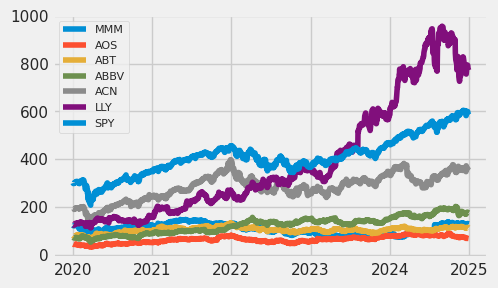

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

### Log returns of the 7 assets:

In [ ]:
data = np.log(df/df.shift(1))
data.iloc[0] = 0
data.head(5)

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
Date,,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.008649,-0.008831,-0.012266,-0.009537,-0.001667,-0.003334,-0.007601
2020-01-06 00:00:00-05:00,0.000952,0.006316,0.005225,0.007861,-0.006551,0.003712,0.003808
2020-01-07 00:00:00-05:00,-0.004039,-0.006738,-0.005575,-0.005721,-0.021827,0.001888,-0.002816
2020-01-08 00:00:00-05:00,0.015229,-0.001480,0.004068,0.007062,0.001960,0.009015,0.005316


## Now, create annualized covariance and correlation matrices.

### Covariance measures the **directional relationship** between the returns on two assets.

In [ ]:
data.mean()*250
cov_matrix = data.cov() * 250
cov_matrix

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
MMM,0.084735,0.044532,0.029603,0.022298,0.039522,0.019445,0.034763
AOS,0.044532,0.090048,0.027495,0.019606,0.041046,0.020330,0.036544
ABT,0.029603,0.027495,0.067746,0.028886,0.039750,0.030728,0.033485
ABBV,0.022298,0.019606,0.028886,0.061874,0.026031,0.031754,0.024058
ACN,0.039522,0.041046,0.039750,0.026031,0.085552,0.029804,0.047499
LLY,0.019445,0.020330,0.030728,0.031754,0.029804,0.102445,0.028939
SPY,0.034763,0.036544,0.033485,0.024058,0.047499,0.028939,0.044097


### Correlation measures the **degree** to which two securities move in relation to each other.

In [ ]:
corr_matrix =data.corr() * 250
corr_matrix

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
MMM,250.000000,127.451027,97.678326,76.986550,116.045121,52.176029,142.175007
AOS,127.451027,250.000000,88.006888,65.666421,116.912928,52.917241,144.982502
ABT,97.678326,88.006888,250.000000,111.538667,130.531504,92.210874,153.158712
ABBV,76.986550,65.666421,111.538667,250.000000,89.446089,99.711641,115.146322
ACN,116.045121,116.912928,130.531504,89.446089,250.000000,79.588092,193.334703
LLY,52.176029,52.917241,92.210874,99.711641,79.588092,250.000000,107.640090
SPY,142.175007,144.982502,153.158712,115.146322,193.334703,107.640090,250.000000


In [ ]:
portfolio1 = data[['MMM','LLY']]
portfolio1.corr() * 250
portfolio1.cov() * 250
# portfolio1

,MMM,LLY
MMM,0.084735,0.019445
LLY,0.019445,0.102445


## Let us assign weights to each investment in the portfolio randomly, and find the variance of this portfolio.

In [ ]:
w = {'MMM': 0.1, 'LLY': 0.2, 'AOS': 0.2, 'ABT': 0.1, 'ABBV': 0.2, 'ACN': 0.05, 'SPY': 0.15}
# sum of all elements in w
sum(w.values())

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

np.float64(0.03703092210045493)

### To optimize the portfolio, we **cannot assign the weights**. We need exact weights that will maximize expected return for a given risk.

### So, let us get the yearly returns for each company using the package resample.

In [ ]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

<ipython-input-16-fbdefa6d49e6>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = df.resample('Y').last().pct_change().mean()


,0
MMM,0.045165
AOS,0.144306
ABT,0.041581
ABBV,0.185137
ACN,0.153931
LLY,0.487153
SPY,0.155179


### Now, the portfolio returns: individual returns multiplied by weights in the portfolio.

In [ ]:
weights = list(w.values())
port_er = (weights*ind_er).sum()
port_er

np.float64(0.13862811920699214)

## Calculate the volatility, or the annualized standard deviation.

In [ ]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

,0
MMM,0.291209
AOS,0.300199
ABT,0.260385
ABBV,0.248844
ACN,0.292609
LLY,0.320197
SPY,0.210075


In [ ]:
data.std()*np.sqrt(250)

,0
MMM,0.291093
AOS,0.300080
ABT,0.260281
ABBV,0.248745
ACN,0.292493
LLY,0.320070
SPY,0.209992


## Create a table for returns and volatility of assets.

In [ ]:
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
MMM,0.045165,0.291209
AOS,0.144306,0.300199
ABT,0.041581,0.260385
ABBV,0.185137,0.248844
ACN,0.153931,0.292609
LLY,0.487153,0.320197
SPY,0.155179,0.210075


In [ ]:
p_ret = []
p_vol = []
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [ ]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [ ]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,MMM weight,AOS weight,ABT weight,ABBV weight,ACN weight,LLY weight,SPY weight
0,0.139132,3.102754,0.030618,0.266735,0.238640,0.290136,0.077025,0.026314,0.070531
1,0.166256,3.046626,0.047492,0.173679,0.155525,0.228265,0.142407,0.087950,0.164681
2,0.140711,3.402518,0.242354,0.213144,0.024322,0.103687,0.328007,0.043913,0.044572
3,0.209151,3.211677,0.071119,0.034012,0.196803,0.050653,0.191512,0.250755,0.205146
4,0.215494,3.515730,0.080357,0.490213,0.013156,0.029678,0.114233,0.226625,0.045738


<Axes: xlabel='Volatility', ylabel='Returns'>

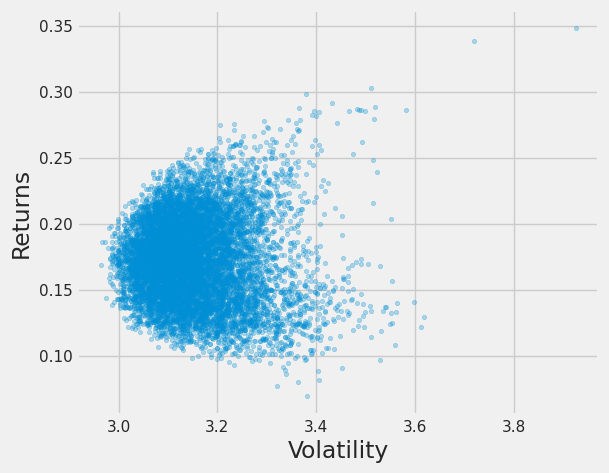

In [ ]:

portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[6,5])

In [ ]:
tickers = ['AFL', 'GOOGL', 'AMT', 'APH', 'APTV','AZO','BXP']
for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2015-01-01", end= "2024-12-31")

for ticker in tickers:
  globals()[ticker] = globals()[ticker].Close

df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = globals()[ticker]

df

,AFL,GOOGL,AMT,APH,APTV,AZO,BXP
Date,,,,,,,
2015-01-02 00:00:00-05:00,23.935610,26.351517,79.193161,12.147760,57.221516,616.789978,88.126625
2015-01-05 00:00:00-05:00,23.308607,25.849413,78.048996,11.925819,54.722652,608.489990,88.925598
2015-01-06 00:00:00-05:00,23.100920,25.211466,77.842407,11.774090,54.375801,607.820007,90.651054
2015-01-07 00:00:00-05:00,23.245907,25.137321,78.660805,11.975646,54.809372,607.239990,91.664856
2015-01-08 00:00:00-05:00,23.473198,25.224901,79.391808,12.208913,56.157333,606.000000,92.034126
...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,102.168449,194.406113,182.756485,70.806572,59.470001,3242.229980,73.530609
2024-12-24 00:00:00-05:00,102.665672,195.884399,183.083588,71.474846,59.950001,3283.479980,74.036308
2024-12-26 00:00:00-05:00,103.083344,195.375000,182.360001,71.375099,60.070000,3241.250000,74.133568


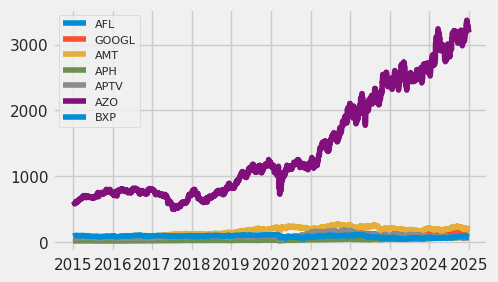

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [ ]:
data = np.log(df/df.shift(1))
data.iloc[0] = 0
data.head(5)

,AFL,GOOGL,AMT,APH,APTV,AZO,BXP
Date,,,,,,,
2015-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-05 00:00:00-05:00,-0.026545,-0.019238,-0.014553,-0.018439,-0.044652,-0.013548,0.009025
2015-01-06 00:00:00-05:00,-0.008950,-0.024989,-0.002650,-0.012804,-0.006359,-0.001102,0.019218
2015-01-07 00:00:00-05:00,0.006257,-0.002945,0.010459,0.016974,0.007942,-0.000955,0.011121
2015-01-08 00:00:00-05:00,0.009730,0.003478,0.009250,0.019291,0.024296,-0.002044,0.004020


In [ ]:
data.mean()*250
cov_matrix = data.cov() * 250
cov_matrix

,AFL,GOOGL,AMT,APH,APTV,AZO,BXP
AFL,0.064598,0.023933,0.023943,0.032790,0.052873,0.025763,0.043439
GOOGL,0.023933,0.080117,0.024037,0.037134,0.048437,0.019827,0.028083
AMT,0.023943,0.024037,0.064681,0.024749,0.029922,0.019724,0.037308
APH,0.032790,0.037134,0.024749,0.058289,0.057017,0.023350,0.036349
APTV,0.052873,0.048437,0.029922,0.057017,0.162655,0.033757,0.057379
AZO,0.025763,0.019827,0.019724,0.023350,0.033757,0.066426,0.024661
BXP,0.043439,0.028083,0.037308,0.036349,0.057379,0.024661,0.094796


In [ ]:
corr_matrix =data.corr() * 250
corr_matrix

,AFL,GOOGL,AMT,APH,APTV,AZO,BXP
AFL,250.000000,83.171504,92.601607,133.591657,128.951898,98.324798,138.777475
GOOGL,83.171504,250.000000,83.477692,135.849028,106.076564,67.946482,80.562721
AMT,92.601607,83.477692,250.000000,100.766673,72.931679,75.228347,119.113340
APH,133.591657,135.849028,100.766673,250.000000,146.392317,93.811533,122.248118
APTV,128.951898,106.076564,72.931679,146.392317,250.000000,81.190270,115.521446
AZO,98.324798,67.946482,75.228347,93.811533,81.190270,250.000000,77.693284
BXP,138.777475,80.562721,119.113340,122.248118,115.521446,77.693284,250.000000


In [ ]:
portfolio1 = data[['AFL','GOOGL']]
portfolio1.corr() * 250
portfolio1.cov() * 250
# portfolio1

,AFL,GOOGL
AFL,0.064598,0.023933
GOOGL,0.023933,0.080117


In [ ]:
w = {'AFL': 0.1, 'GOOGL': 0.2, 'AMT': 0.2, 'APH': 0.1, 'APTV': 0.2, 'AZO': 0.05, 'BXP': 0.15}
# sum of all elements in w
sum(w.values())

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

np.float64(0.045546425992230966)

In [ ]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

<ipython-input-38-fbdefa6d49e6>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = df.resample('Y').last().pct_change().mean()


,0
AFL,0.183447
GOOGL,0.238827
AMT,0.121509
APH,0.230834
APTV,0.050028
AZO,0.198356
BXP,0.002970


In [ ]:
data.std()*np.sqrt(250)

,0
AFL,0.254161
GOOGL,0.283049
AMT,0.254324
APH,0.241431
APTV,0.403305
AZO,0.257732
BXP,0.307890


In [ ]:
# Instead of using the old ann_sd variable, recalculate the annualized standard deviation
# for each asset using the current data:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))

# Now, 'ann_sd' should be a pandas Series, and the following line should work:
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AFL,0.183447,0.254212
GOOGL,0.238827,0.283105
AMT,0.121509,0.254374
APH,0.230834,0.241479
APTV,0.050028,0.403385
AZO,0.198356,0.257784
BXP,0.002970,0.307951


In [ ]:
p_ret = []
p_vol = []
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [ ]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [ ]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AFL weight,GOOGL weight,AMT weight,APH weight,APTV weight,AZO weight,BXP weight
0,0.167041,3.056419,0.066777,0.117120,0.185360,0.262298,0.091683,0.196228,0.080534
1,0.099649,3.873264,0.047518,0.037370,0.050645,0.189933,0.318471,0.076871,0.279191
2,0.097831,3.722674,0.080421,0.021650,0.048633,0.010189,0.300114,0.271417,0.267578
3,0.163916,3.184184,0.155174,0.236402,0.184165,0.154399,0.129595,0.072023,0.068241
4,0.147669,3.117563,0.193680,0.162105,0.180349,0.137417,0.060163,0.081832,0.184455


<Axes: xlabel='Volatility', ylabel='Returns'>

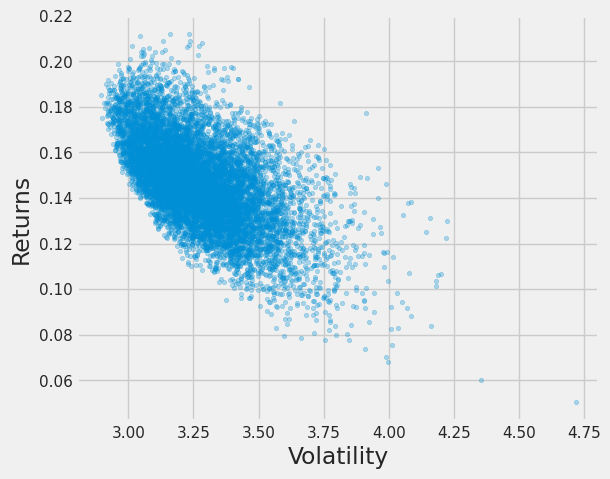

In [ ]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[6,5])